In [200]:
## **DSA 210 Term Project**

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


In [202]:
# Load the dataset from CSV file

In [203]:
df = pd.read_csv("raw data/FAOSTAT_data_en_4-25-2025-2.csv")

In [204]:
# Display the first  and last 5 rows of the dataframe to understand the structure

In [205]:
print(df.head())

  Domain Code                 Domain  Area Code (M49)         Area  \
0         FBS  Food Balances (2010-)                4  Afghanistan   
1         FBS  Food Balances (2010-)                4  Afghanistan   
2         FBS  Food Balances (2010-)                4  Afghanistan   
3         FBS  Food Balances (2010-)                4  Afghanistan   
4         FBS  Food Balances (2010-)                4  Afghanistan   

   Element Code                                 Element Item Code (FBS)  \
0           674  Protein supply quantity (g/capita/day)           S2511   
1           684      Fat supply quantity (g/capita/day)           S2511   
2           674  Protein supply quantity (g/capita/day)           S2807   
3           684      Fat supply quantity (g/capita/day)           S2807   
4           674  Protein supply quantity (g/capita/day)           S2513   

                  Item  Year Code  Year     Unit  Value Flag Flag Description  \
0   Wheat and products       2019  2019  g/cap/

In [206]:
print(df.tail())

      Domain Code                 Domain  Area Code (M49)      Area  \
37431         FBS  Food Balances (2010-)              716  Zimbabwe   
37432         FBS  Food Balances (2010-)              716  Zimbabwe   
37433         FBS  Food Balances (2010-)              716  Zimbabwe   
37434         FBS  Food Balances (2010-)              716  Zimbabwe   
37435         FBS  Food Balances (2010-)              716  Zimbabwe   

       Element Code                                 Element Item Code (FBS)  \
37431           684      Fat supply quantity (g/capita/day)           S2775   
37432           674  Protein supply quantity (g/capita/day)           S2680   
37433           684      Fat supply quantity (g/capita/day)           S2680   
37434           674  Protein supply quantity (g/capita/day)           S2899   
37435           684      Fat supply quantity (g/capita/day)           S2899   

                 Item  Year Code  Year     Unit  Value Flag Flag Description  \
37431  Aquatic Pla

In [207]:
# Show the number of rows and columns in the dataset

In [208]:
print(df.shape)

(37436, 15)


In [209]:
# We first create the `df_pivot` again by aggregating the data.

In [210]:
df_filtered = df[["Area", "Element", "Value"]].copy()
df_totals = df_filtered.groupby(["Area", "Element"])["Value"].sum().reset_index()
df_pivot = df_totals.pivot(index="Area", columns="Element", values="Value").reset_index()
df_pivot.columns.name = None

In [211]:
# Now, let's check for NaN values in the `df_pivot` dataframe

In [212]:
print(df_pivot.isnull().sum())

Area                                      0
Fat supply quantity (g/capita/day)        0
Protein supply quantity (g/capita/day)    0
dtype: int64


In [213]:
# Display the first and last few rows of df_pivot to preview the cleaned and pivoted data

In [214]:
print(df_pivot.head())
print(df_pivot.tail())

                  Area  Fat supply quantity (g/capita/day)  \
0          Afghanistan                               41.86   
1              Albania                              115.14   
2              Algeria                               96.96   
3               Angola                               54.47   
4  Antigua and Barbuda                               92.40   

   Protein supply quantity (g/capita/day)  
0                                   60.97  
1                                  118.42  
2                                   95.96  
3                                   48.70  
4                                   92.83  
                                   Area  Fat supply quantity (g/capita/day)  \
186  Venezuela (Bolivarian Republic of)                               83.78   
187                            Viet Nam                               60.71   
188                               Yemen                               39.41   
189                              Zambia        

In [215]:
# Show the shape of df_pivot to verify the number of countries and features

In [216]:
print(df_pivot.shape)

(191, 3)


In [217]:
# Display column-wise data types and non-null counts for df_pivot

In [218]:
print(df_pivot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Area                                    191 non-null    object 
 1   Fat supply quantity (g/capita/day)      191 non-null    float64
 2   Protein supply quantity (g/capita/day)  191 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB
None


In [219]:
# Generate summary statistics for fat and protein supply columns

In [220]:
print(df_pivot.describe())

       Fat supply quantity (g/capita/day)  \
count                          191.000000   
mean                            92.467644   
std                             37.405169   
min                              0.000000   
25%                             63.230000   
50%                             91.730000   
75%                            118.870000   
max                            183.240000   

       Protein supply quantity (g/capita/day)  
count                              191.000000  
mean                                87.305445  
std                                 24.977371  
min                                  0.000000  
25%                                 68.735000  
50%                                 90.300000  
75%                                106.990000  
max                                152.620000  


In [221]:
# Plot the distribution of protein and fat supply per capita using histograms with KDE curves

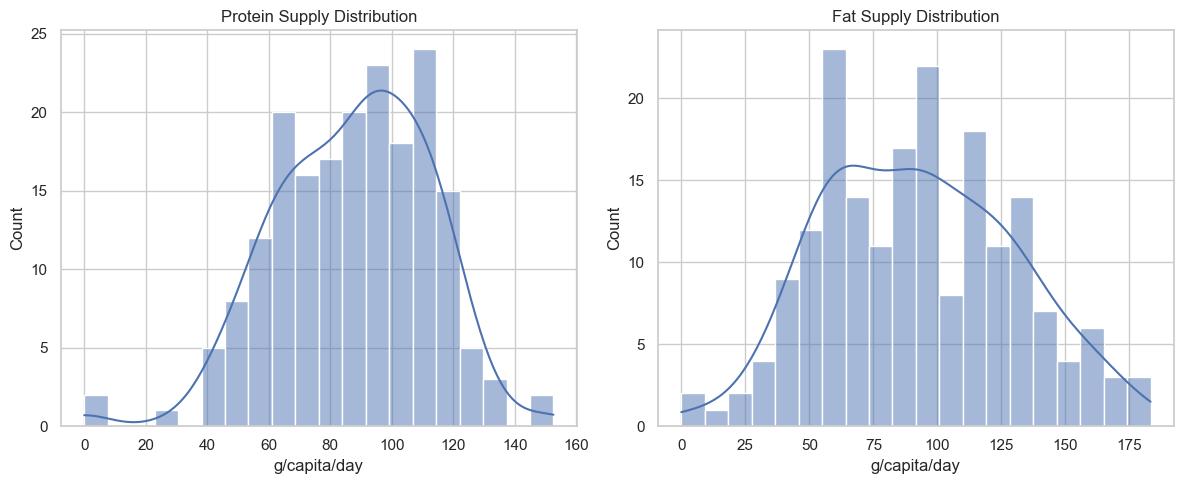

In [222]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_pivot["Protein supply quantity (g/capita/day)"], kde=True, bins=20)
plt.title("Protein Supply Distribution")
plt.xlabel("g/capita/day")

plt.subplot(1, 2, 2)
sns.histplot(df_pivot["Fat supply quantity (g/capita/day)"], kde=True, bins=20)
plt.title("Fat Supply Distribution")
plt.xlabel("g/capita/day")

plt.tight_layout()
plt.show()

In [223]:
# Compare the spread and potential outliers in protein and fat supply using boxplots

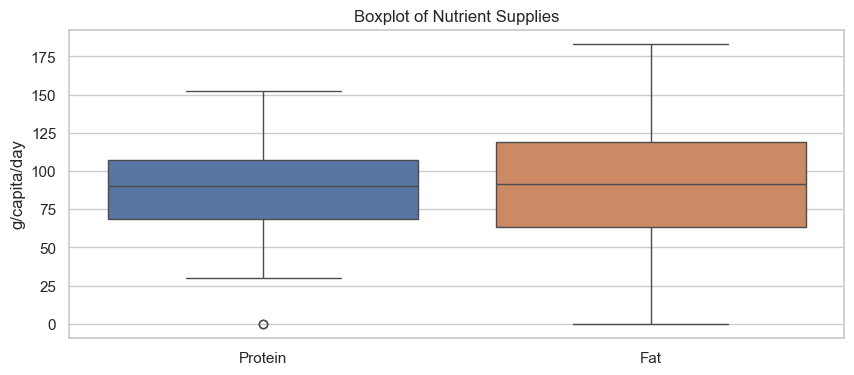

In [224]:
plt.figure(figsize=(10, 4))

sns.boxplot(data=df_pivot[["Protein supply quantity (g/capita/day)", 
                           "Fat supply quantity (g/capita/day)"]])
plt.title("Boxplot of Nutrient Supplies")
plt.ylabel("g/capita/day")
plt.xticks([0, 1], ["Protein", "Fat"])

plt.show()


# IQ Dataset 

Load the average IQ dataset from CSV

In [225]:
df_iq = pd.read_csv("raw data/Average IQ 2019.csv")

Display the first few rows and column names of the IQ dataset. 

In [226]:
print(df_iq.head())
print(df_iq.columns)

   Ranking     Region  Average IQ 2019
0        1      Japan           106.48
1        2     Taiwan           106.47
2        3  Singapore           105.89
3        4  Hong Kong           105.37
4        5      China           104.10
Index(['Ranking', 'Region', 'Average IQ 2019'], dtype='object')


Display the last few rows to check for data completeness and possible anomalies.

In [227]:
print(df_iq.tail())

     Ranking        Region  Average IQ 2019
194      195    Cape Verde            52.50
195      196     Guatemala            47.72
196      197  Sierra Leone            45.07
197      198       Liberia            45.07
198      199         Nepal            42.99


Show the shape of the IQ dataset (number of countries and features).

In [228]:
print(df_iq.shape)

(199, 3)


Plot the distribution of IQ scores with a histogram and KDE on a twin axis.

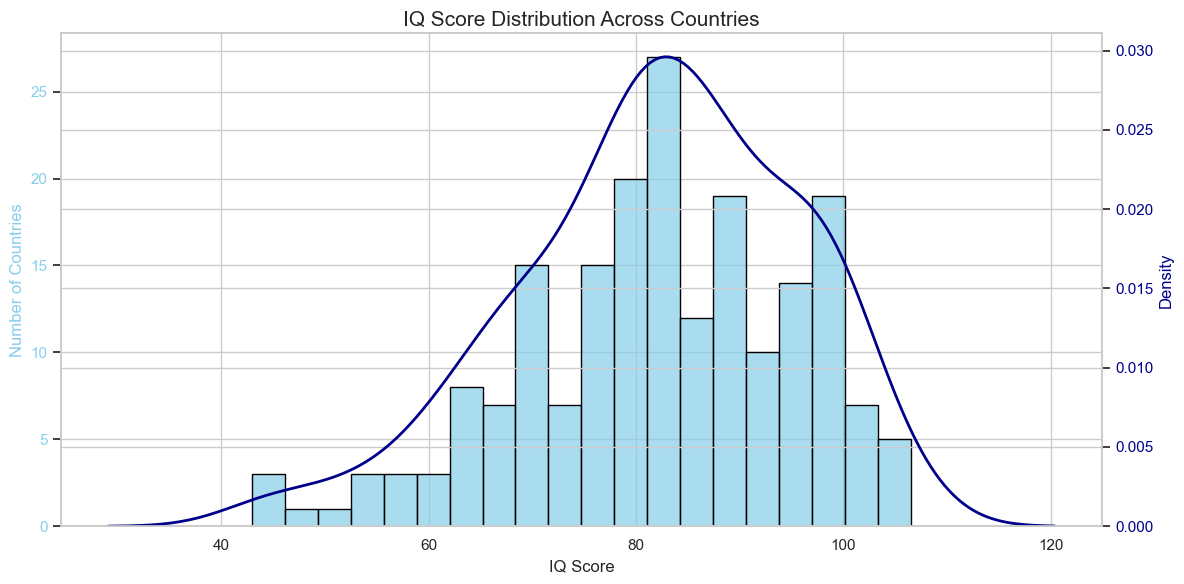

In [229]:
sns.set(style="whitegrid")

iq_vals = df_iq["Average IQ 2019"].dropna().sort_values()

fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = "skyblue"
sns.histplot(iq_vals, bins=20, kde=False, ax=ax1, color=color1, edgecolor="black", alpha=0.7)
ax1.set_xlabel("IQ Score", fontsize=12)
ax1.set_ylabel("Number of Countries", fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = "darkblue"
sns.kdeplot(iq_vals, ax=ax2, color=color2, linewidth=2)
ax2.set_ylabel("Density", fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("IQ Score Distribution Across Countries", fontsize=15)
fig.tight_layout()
plt.show()


Rename columns for consistency, drop irrelevant columns, convert IQ to numeric, and check for missing values.

In [230]:
df_iq = df_iq.rename(columns={
    "Region": "Area",                  
    "Average IQ 2019": "IQ"
})

df_iq = df_iq.drop(columns=["Ranking"])

df_iq["IQ"] = pd.to_numeric(df_iq["IQ"], errors="coerce")

print(df_iq.isnull().sum())

print(df_iq.head())

Area    0
IQ      0
dtype: int64
        Area      IQ
0      Japan  106.48
1     Taiwan  106.47
2  Singapore  105.89
3  Hong Kong  105.37
4      China  104.10


Identify countries present in IQ dataset but missing in FAO dataset.

In [231]:
missing_from_fao = df_iq[~df_iq["Area"].isin(df_pivot["Area"])]
print("IQ dataset but NOT in FAO dataset:")
print(missing_from_fao["Area"].sort_values().tolist())

IQ dataset but NOT in FAO dataset:
['Andorra', 'Bermuda', 'Bolivia', 'British Virgin Islands', 'Brunei', 'Cape Verde', 'Cayman Islands', 'Cook Islands', 'Czech Republic', 'DR Congo', 'Eritrea', 'Greenland', 'Hong Kong', 'Iran', 'Ivory Coast', 'Laos', 'Liechtenstein', 'Macau', 'Micronesia', 'Moldova', 'Netherlands', 'North Korea', 'Northern Mariana Islands', 'Palestine', 'Puerto Rico', 'Republic of the Congo', 'Russia', 'Singapore', 'South Korea', 'Syria', 'Taiwan', 'Tanzania', 'Timor Leste', 'Turkey', 'Turks and Caicos Islands', 'United Kingdom', 'United States', 'Venezuela', 'Vietnam']


Identify countries present in FAO dataset but missing in IQ dataset.

In [232]:
missing_from_iq = df_pivot[~df_pivot["Area"].isin(df_iq["Area"])]
print("FAO dataset but NOT in IQ dataset:")
print(missing_from_iq["Area"].sort_values().tolist())

FAO dataset but NOT in IQ dataset:
['Bolivia (Plurinational State of)', 'Cabo Verde', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland', 'Congo', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'French Polynesia', 'Guinea-Bissau', 'Iran (Islamic Republic of)', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'Nauru', 'Netherlands (Kingdom of the)', 'Netherlands Antilles (former)', 'Republic of Korea', 'Republic of Moldova', 'Russian Federation', 'Syrian Arab Republic', 'Timor-Leste', 'Tuvalu', 'Türkiye', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam']


Create a mapping dictionary to standardize country names between IQ and FAO datasets.

In [233]:
country_name_map = {
    "Bolivia": "Bolivia (Plurinational State of)",
    "Cape Verde": "Cabo Verde",
    "Hong Kong": "China, Hong Kong SAR",
    "Macau": "China, Macao SAR",
    "Taiwan": "China, Taiwan Province of",
    "Czech Republic": "Czechia",
    "Ivory Coast": "Côte d'Ivoire",
    "North Korea": "Democratic People's Republic of Korea",
    "DR Congo": "Democratic Republic of the Congo",
    "Republic of the Congo": "Congo",
    "Iran": "Iran (Islamic Republic of)",
    "Laos": "Lao People's Democratic Republic",
    "Micronesia": "Micronesia (Federated States of)",
    "Moldova": "Republic of Moldova",
    "Netherlands": "Netherlands (Kingdom of the)",
    "South Korea": "Republic of Korea",
    "Russia": "Russian Federation",
    "Syria": "Syrian Arab Republic",
    "Timor Leste": "Timor-Leste",
    "Turkey": "Türkiye",
    "Tanzania": "United Republic of Tanzania",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "United States": "United States of America",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Vietnam": "Viet Nam"
}

Apply the country name mapping to the IQ dataset for consistent merging.

In [234]:
df_iq["Area"] = df_iq["Area"].replace(country_name_map)

Merge IQ and FAO datasets on 'Area' using an inner join to retain only common countries.

In [235]:
df_merged = df_pivot.merge(df_iq, on="Area", how="inner")
print("Merged shape:", df_merged.shape)
print(df_merged.head())

Merged shape: (185, 4)
                  Area  Fat supply quantity (g/capita/day)  \
0          Afghanistan                               41.86   
1              Albania                              115.14   
2              Algeria                               96.96   
3               Angola                               54.47   
4  Antigua and Barbuda                               92.40   

   Protein supply quantity (g/capita/day)     IQ  
0                                   60.97  82.12  
1                                  118.42  81.75  
2                                   95.96  76.00  
3                                   48.70  75.10  
4                                   92.83  70.48  


Display the first few rows of the merged dataset.

In [236]:
print(df_merged.head())

                  Area  Fat supply quantity (g/capita/day)  \
0          Afghanistan                               41.86   
1              Albania                              115.14   
2              Algeria                               96.96   
3               Angola                               54.47   
4  Antigua and Barbuda                               92.40   

   Protein supply quantity (g/capita/day)     IQ  
0                                   60.97  82.12  
1                                  118.42  81.75  
2                                   95.96  76.00  
3                                   48.70  75.10  
4                                   92.83  70.48  


Show the last few rows of the merged dataset to verify final entries.

In [237]:
print(df_merged.tail())

                                   Area  Fat supply quantity (g/capita/day)  \
180  Venezuela (Bolivarian Republic of)                               83.78   
181                            Viet Nam                               60.71   
182                               Yemen                               39.41   
183                              Zambia                               45.53   
184                            Zimbabwe                               64.25   

     Protein supply quantity (g/capita/day)     IQ  
180                                   58.16  82.99  
181                                   93.44  89.53  
182                                   54.85  62.86  
183                                   46.66  68.43  
184                                   54.34  74.01  


Display the shape of the final merged dataset.

In [238]:
print(df_merged.shape)

(185, 4)


Compute the Pearson correlation matrix between IQ, protein, and fat intake.

In [239]:
corr_matrix = df_merged[[
    "Protein supply quantity (g/capita/day)",
    "Fat supply quantity (g/capita/day)",
    "IQ"
]].corr()
print(corr_matrix)

                                        Protein supply quantity (g/capita/day)  \
Protein supply quantity (g/capita/day)                                1.000000   
Fat supply quantity (g/capita/day)                                    0.807755   
IQ                                                                    0.602490   

                                        Fat supply quantity (g/capita/day)  \
Protein supply quantity (g/capita/day)                            0.807755   
Fat supply quantity (g/capita/day)                                1.000000   
IQ                                                                0.648471   

                                              IQ  
Protein supply quantity (g/capita/day)  0.602490  
Fat supply quantity (g/capita/day)      0.648471  
IQ                                      1.000000  


Visualize the relationship between protein/fat intake and IQ using scatter plots with regression lines.

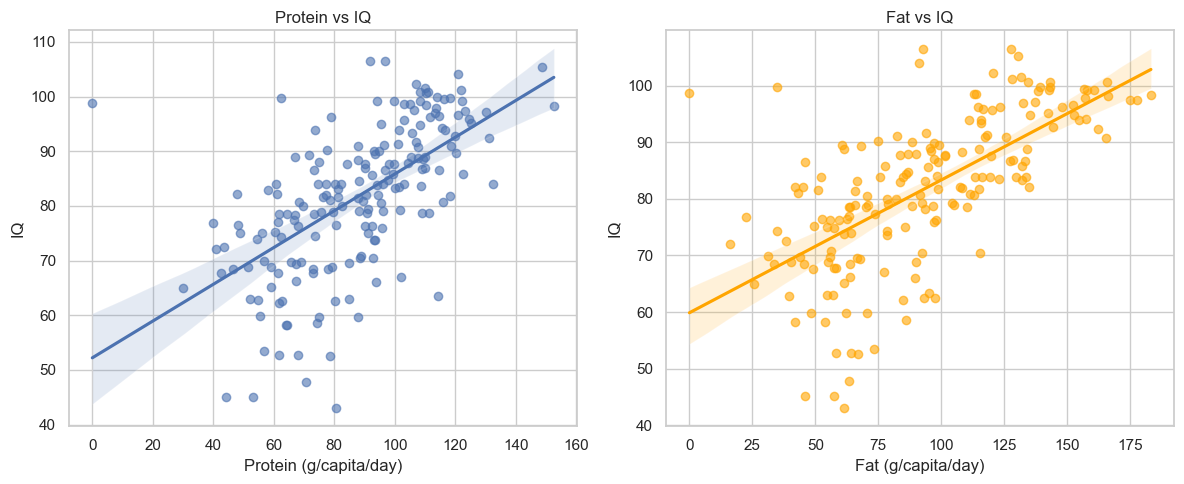

In [240]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(
    data=df_merged,
    x="Protein supply quantity (g/capita/day)",
    y="IQ",
    scatter_kws={"alpha":0.6}
)
plt.title("Protein vs IQ")
plt.xlabel("Protein (g/capita/day)")
plt.ylabel("IQ")

plt.subplot(1,2,2)
sns.regplot(
    data=df_merged,
    x="Fat supply quantity (g/capita/day)",
    y="IQ",
    scatter_kws={"alpha":0.6},
    color="orange"
)
plt.title("Fat vs IQ")
plt.xlabel("Fat (g/capita/day)")
plt.ylabel("IQ")

plt.tight_layout()
plt.show()

Perform Pearson correlation tests and extract both correlation coefficient and p-value for protein and fat vs IQ.

In [241]:
protein_corr, protein_pval = pearsonr(
    df_merged["Protein supply quantity (g/capita/day)"],
    df_merged["IQ"]
)
print(f"Protein vs IQ → r = {protein_corr:.3f}, p = {protein_pval:.4f}")

fat_corr, fat_pval = pearsonr(
    df_merged["Fat supply quantity (g/capita/day)"],
    df_merged["IQ"]
)
print(f"Fat vs IQ → r = {fat_corr:.3f}, p = {fat_pval:.4f}")

Protein vs IQ → r = 0.602, p = 0.0000
Fat vs IQ → r = 0.648, p = 0.0000


Fit a multiple linear regression model to predict IQ based on protein and fat supply quantities.

In [242]:
X = df_merged[[
    "Protein supply quantity (g/capita/day)",
    "Fat supply quantity (g/capita/day)"
]]
X = sm.add_constant(X)
y = df_merged["IQ"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     71.02
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.60e-23
Time:                        23:38:04   Log-Likelihood:                -689.95
No. Observations:                 185   AIC:                             1386.
Df Residuals:                     182   BIC:                             1396.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Visualize a 3D regression surface of protein and fat intake vs IQ to show the combined effect of both predictors.

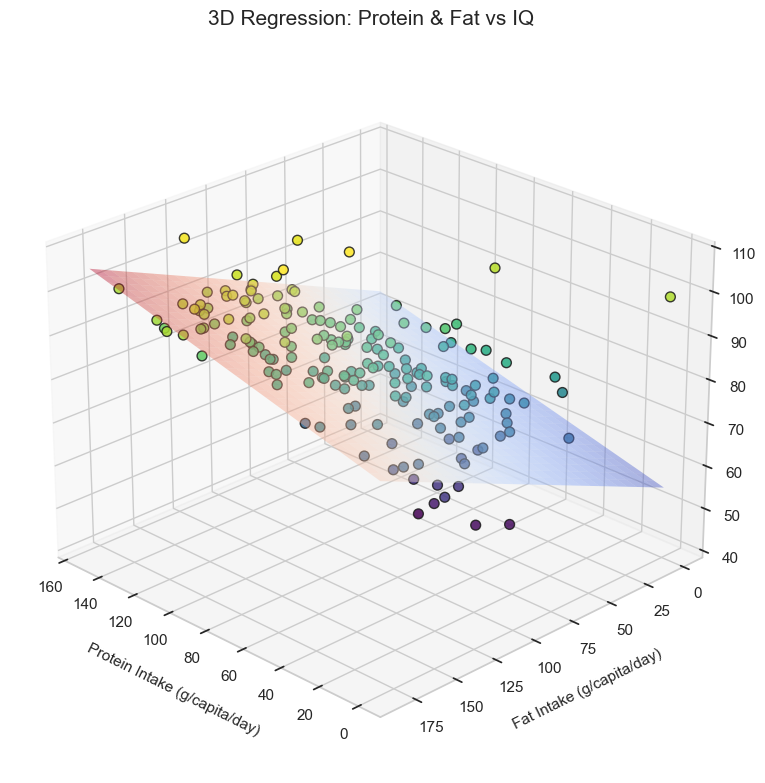

In [243]:
X = df_merged[[
    "Protein supply quantity (g/capita/day)",
    "Fat supply quantity (g/capita/day)"
]].values
y = df_merged["IQ"].values

model = LinearRegression().fit(X, y)

x_surf, y_surf = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
)
z_pred = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap="viridis", s=50, edgecolor='k', alpha=0.85)

ax.plot_surface(x_surf, y_surf, z_pred, alpha=0.4, cmap="coolwarm", edgecolor='none')

ax.set_xlabel("Protein Intake (g/capita/day)", labelpad=10, fontsize=11)
ax.set_ylabel("Fat Intake (g/capita/day)", labelpad=10, fontsize=11)
ax.set_zlabel("Average IQ", labelpad=10, fontsize=11)
ax.set_title("3D Regression: Protein & Fat vs IQ", fontsize=15, pad=20)

ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()